In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.callbacks import EarlyStopping
import os
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.applications import VGG16

In [6]:
data_dir = "PLANT"
batch_size = 32
input_shape = (224, 224, 3) 

In [7]:
datagen = ImageDataGenerator(
 rescale=1.0/255.0,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest',
 validation_split=0.2
)

In [8]:
data_generator = datagen.flow_from_directory(
 data_dir,
 target_size=input_shape[:2],
 batch_size=batch_size,
 class_mode='categorical',
 subset='training'
)

Found 1981 images belonging to 2 classes.


In [9]:
validation_generator = datagen.flow_from_directory(
 data_dir,
 target_size=input_shape[:2],
 batch_size=batch_size,
 class_mode='categorical',
 subset='validation' 
)

Found 494 images belonging to 2 classes.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model on top
model2 = Sequential([
    base_model,  # Add the VGG16 base model
    Flatten(),  # Flatten the output
    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

In [5]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
history2 = model2.fit(
 data_generator,
 steps_per_epoch=data_generator.samples // batch_size,
 epochs=10,
 validation_data=validation_generator,
 validation_steps=validation_generator.samples // batch_size, callbacks=[early_stopping]
)


Epoch 1/10
61/61 [==============================] - 1259s 21s/step - loss: 0.3829 - accuracy: 0.8091 - val_loss: 0.1504 - val_accuracy: 0.9604
Epoch 2/10
61/61 [==============================] - 877s 14s/step - loss: 0.2270 - accuracy: 0.9600 - val_loss: 0.2737 - val_accuracy: 0.9646
Epoch 3/10
61/61 [==============================] - 709s 12s/step - loss: 0.0685 - accuracy: 0.9892 - val_loss: 0.0423 - val_accuracy: 0.9833
Epoch 4/10
61/61 [==============================] - 716s 12s/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0334 - val_accuracy: 0.9937
Epoch 5/10
61/61 [==============================] - 1125s 19s/step - loss: 0.0167 - accuracy: 0.9959 - val_loss: 0.0377 - val_accuracy: 0.9875
Epoch 6/10
61/61 [==============================] - 1876s 31s/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 0.0173 - val_accuracy: 0.9958
Epoch 7/10
61/61 [==============================] - 1956s 32s/step - loss: 0.0185 - accuracy: 0.9954 - val_loss: 0.0233 - val_accuracy: 0.9958
Ep

1/1 [==============================] - 3s 3s/step


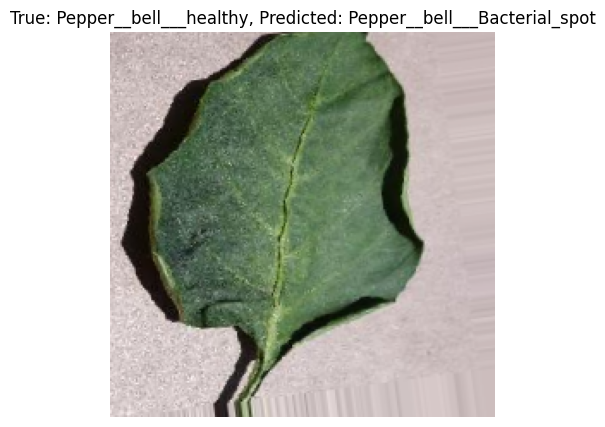

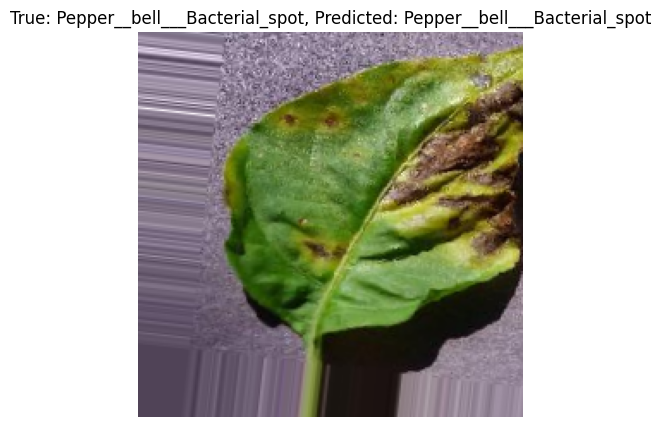

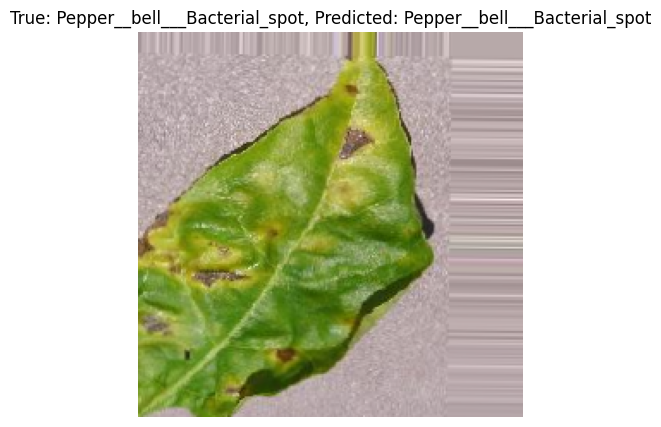

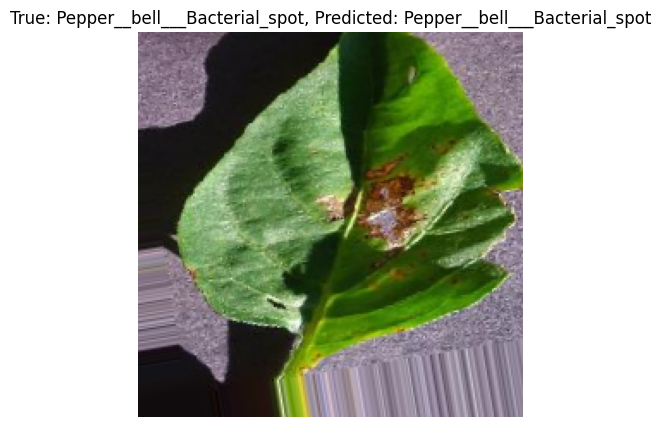

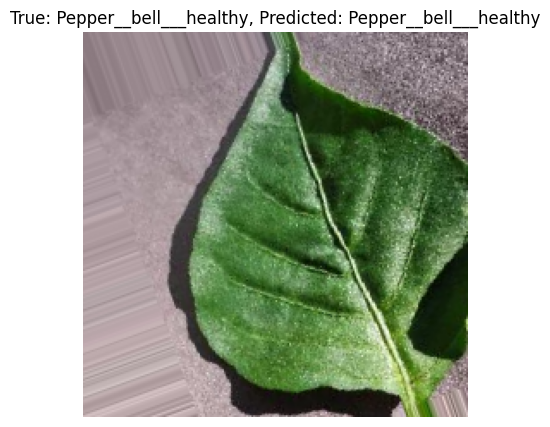

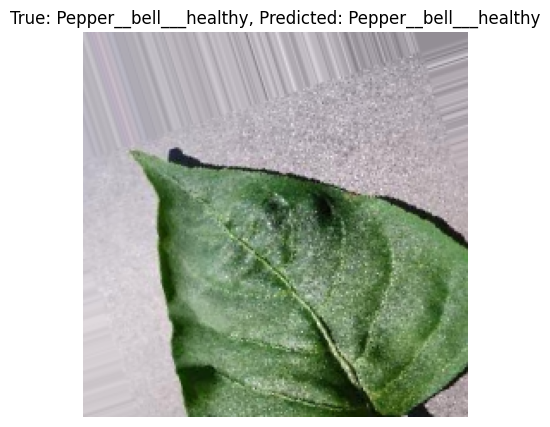

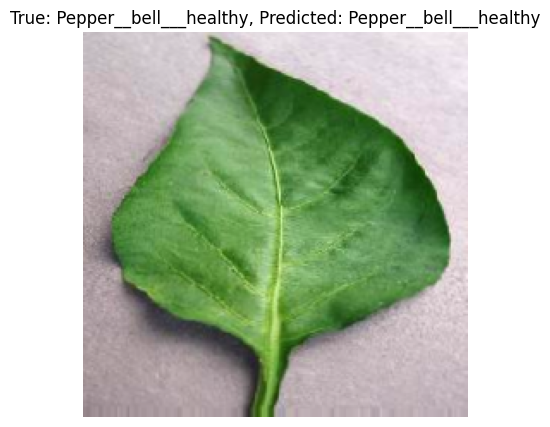

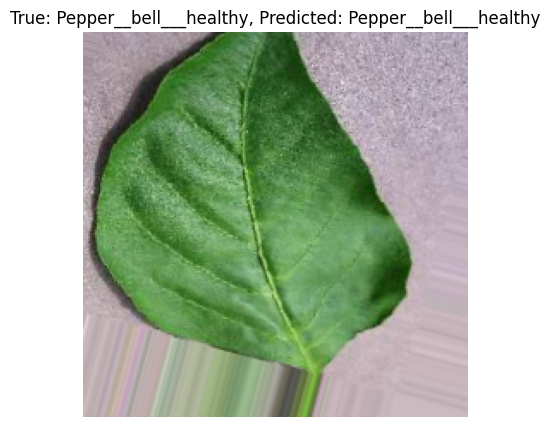

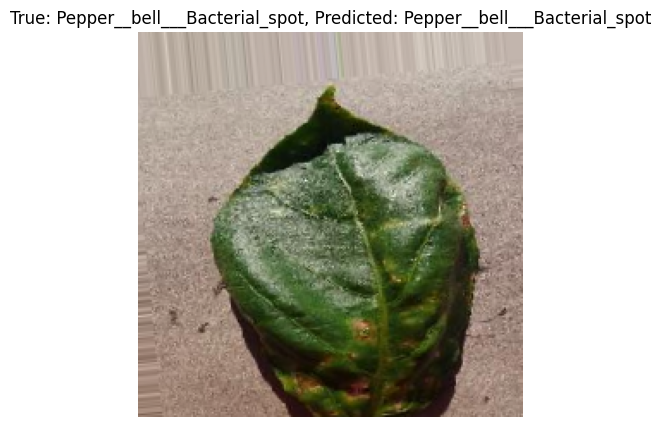

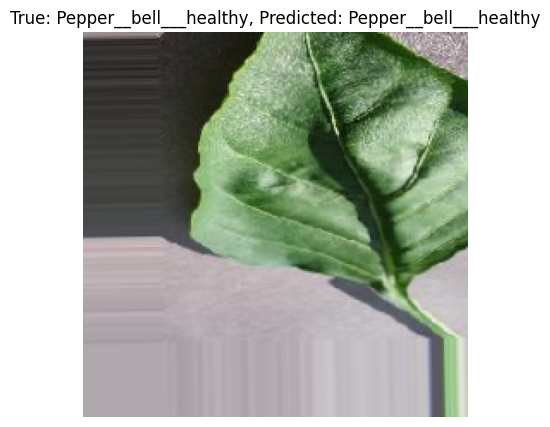

In [15]:
images, labels = validation_generator.next()
# Make predictions using the model
predictions = model2.predict(images)
# Convert one-hot encoded labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
# Get class labels from the generator
class_labels = list(validation_generator.class_indices.keys())
# Display 10 images and their predictions
num_images_to_display = 10
for i in range(num_images_to_display):
 plt.figure(figsize=(5, 5))
 plt.imshow(image.array_to_img(images[i]))
 true_label = class_labels[np.argmax(labels[i])]
 predicted_label = class_labels[predicted_classes[i]]
 plt.title(f"True: {true_label}, Predicted: {predicted_label}")
 plt.axis('off')
 plt.show()


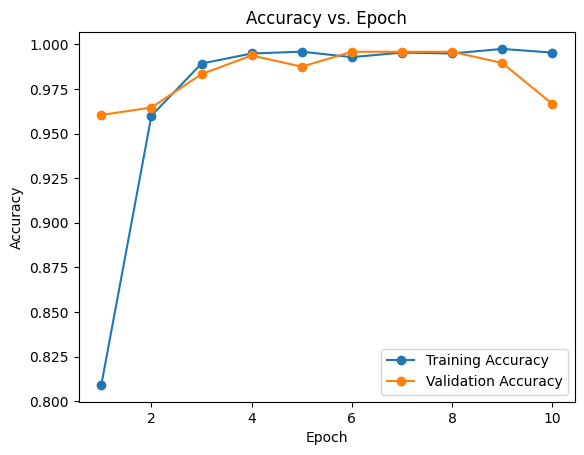

In [16]:
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history.get('val_accuracy', None)
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', linestyle='-')
if validation_accuracy:
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()
plt.show()

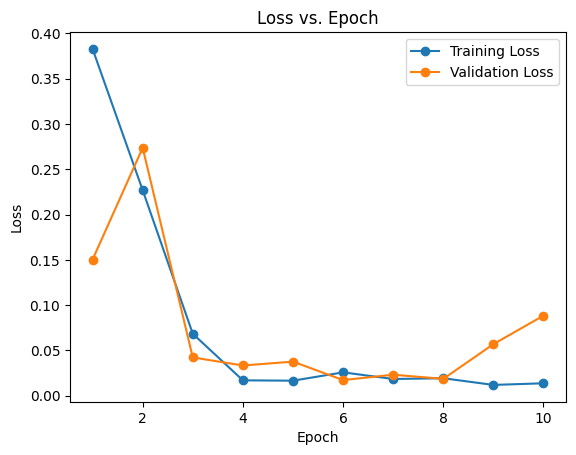

In [17]:
training_loss = history2.history['loss']
validation_loss = history2.history.get('val_loss', None)
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
if validation_loss:
    plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()


In [18]:
training_accuracy = history2.history['accuracy']
print(f"Training Accuracy: {training_accuracy[-1]:.2f}")

# Check validation accuracy
validation_accuracy = history2.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.2f}")

Training Accuracy: 1.00
Validation Accuracy: 0.97


In [19]:
model2.save('VGG16.h5')

C:\Users\NIYAJ\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
